In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifa21_data = pd.read_csv('fifa21_training.csv').drop(['Unnamed: 0', 'ID'], axis = 1)

In [3]:
attacking_data = fifa21_data[['Name', 'Attacking']].sort_values(by = 'Attacking', ascending = False)[0:5]
defending_data = fifa21_data[['Name', 'Defending']].sort_values(by = 'Defending', ascending = False)[0:5]
finishing_data = fifa21_data[['Name', 'Finishing']].sort_values(by = 'Finishing', ascending = False)[0:5]
sprintspeed_data = fifa21_data[['Name', 'Sprint Speed']].sort_values(by = 'Sprint Speed', ascending = False)[0:5]
goalkeeping_data = fifa21_data[['Name', 'Goalkeeping']].sort_values(by = 'Goalkeeping', ascending = False)[0:5]
shortpassing_data = fifa21_data[['Name', 'Short Passing']].sort_values(by = 'Short Passing', ascending = False)[0:5]
overall_rating_data = fifa21_data[['Name', 'OVA']].sort_values(by = 'OVA', ascending = False)[0:5]

In [4]:
overalls_dataframes = [attacking_data, defending_data, finishing_data, sprintspeed_data, goalkeeping_data, shortpassing_data, overall_rating_data]

In [5]:
best_players_names = overall_rating_data['Name']

In [6]:
data_from_best_players = fifa21_data[fifa21_data['Name'].isin(best_players_names)]

In [7]:
data_from_best_players.select_dtypes(include = np.number)

,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
2219,31,0,423,71,94,85,84,89.0,407,85,...,10,2195,457,78,91,78,85,43,82,91
5291,33,0,429,85,95,70,91,88.0,470,96,...,8,2231,466,85,92,91,95,38,65,93
8048,35,0,437,84,95,90,82,86.0,414,88,...,11,2221,464,89,93,81,89,35,77,92
9219,29,0,407,94,82,55,94,82.0,441,88,...,13,2304,485,76,86,93,88,64,78,91
11827,27,2,95,13,11,15,43,13.0,109,12,...,90,1413,489,87,92,78,90,52,90,91


In [8]:
cleaned_hits_1 = list()
cleaned_hits_2 = list()
to_avoid_values = ['K', '.']

for hits in fifa21_data['Hits'].values:
    new_character = str()
    for character in hits:
        if character not in to_avoid_values:
            new_character += character
    cleaned_hits_1.append(new_character)

In [9]:
for hits in cleaned_hits_1:
    new_hits = hits
    if len(hits) > 1:
        new_hits += '00'
        cleaned_hits_2.append(new_hits)
    else:
        new_hits += '000'
        cleaned_hits_2.append(new_hits)

fifa21_data['Hits'] = cleaned_hits_2

In [10]:
fifa21_data['Hits'] = fifa21_data['Hits'].astype('float64')

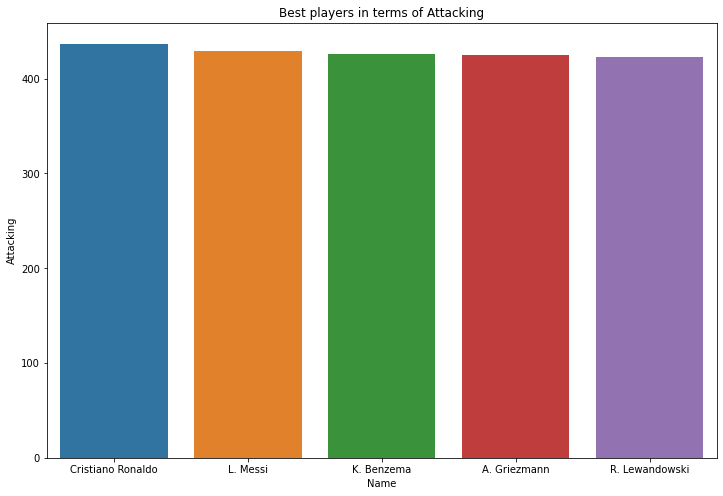

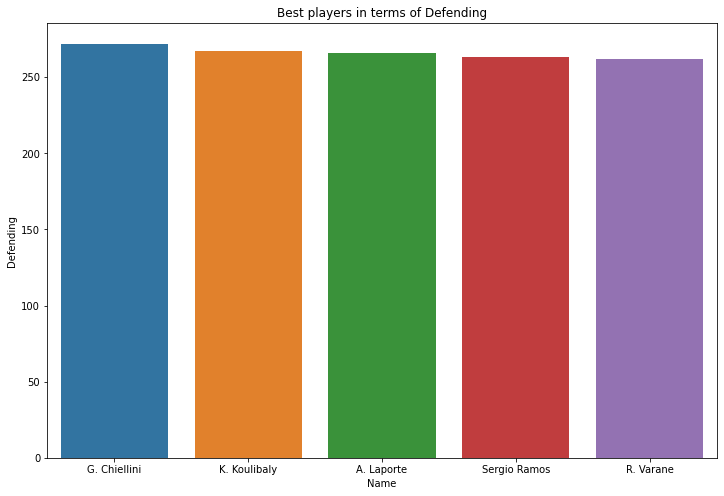

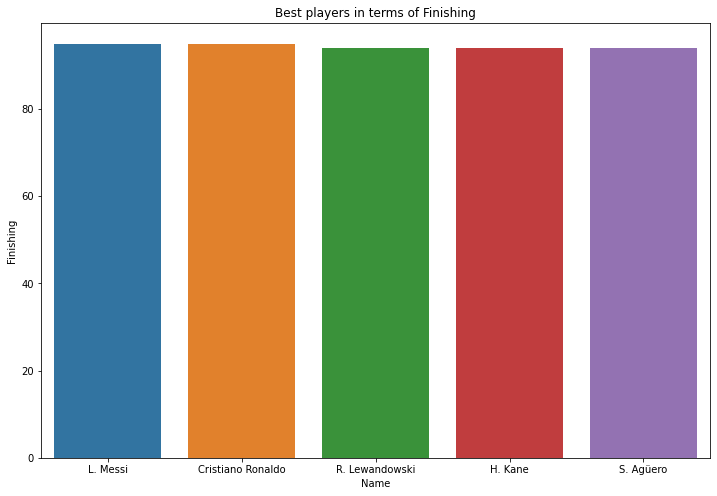

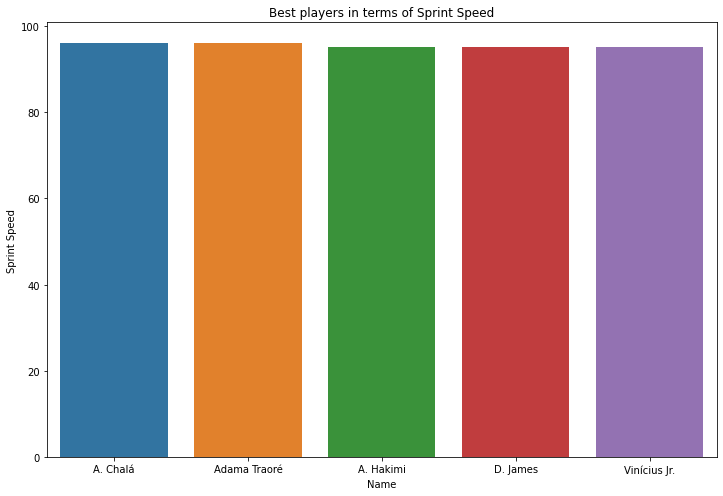

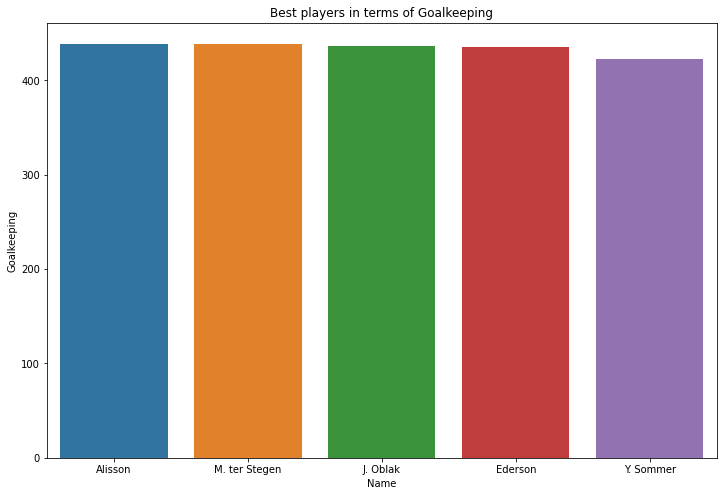

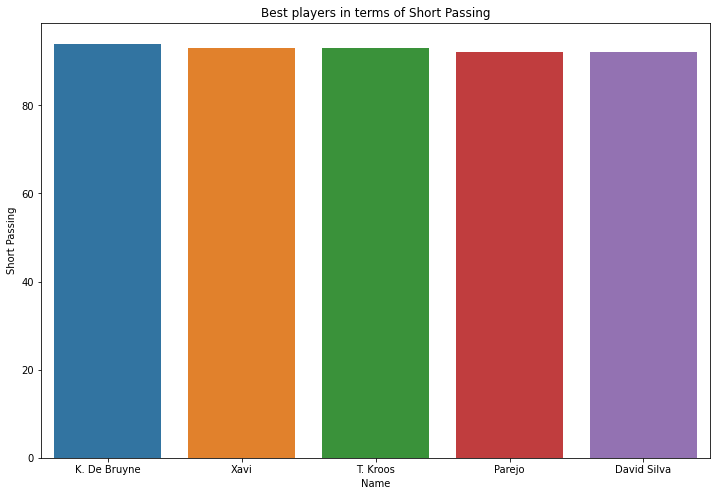

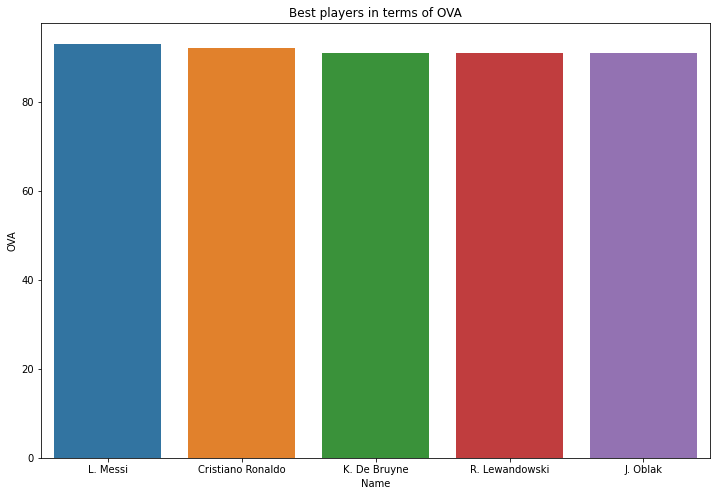

In [11]:
for dataframe in overalls_dataframes:

    columns = dataframe.columns.to_list()
    fig = plt.figure(figsize = (12, 8))
    sns.barplot(x = columns[0], y = columns[1], data = dataframe)
    plt.title(F'Best players in terms of {columns[1]}')
    plt.show()

In [12]:
fifa21_numerical_data = fifa21_data.select_dtypes(include = np.number)

<AxesSubplot:>

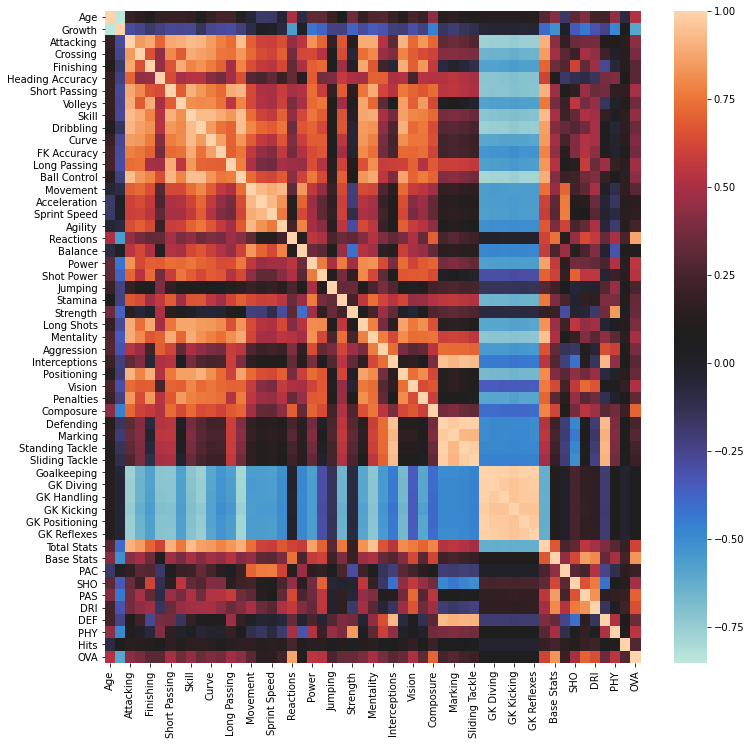

In [13]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(fifa21_numerical_data.corr(), cmap = 'icefire')

<AxesSubplot:>

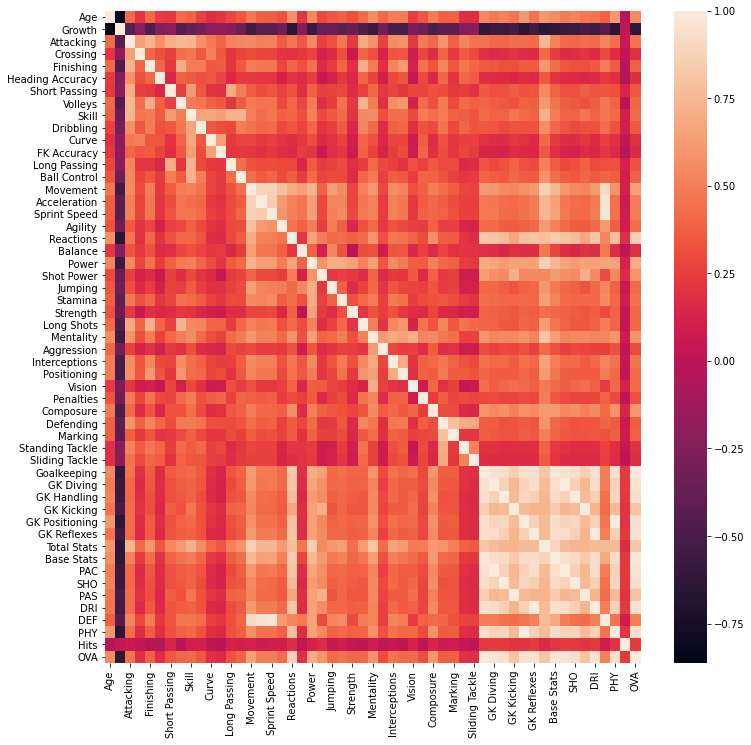

In [14]:
goalkeepers_data = fifa21_data[fifa21_data['Position'] == 'GK']
goalkeepers_data = goalkeepers_data.select_dtypes(include = np.number)
fig = plt.figure(figsize = (12,12))
sns.heatmap(goalkeepers_data.corr())

In [32]:
st = fifa21_data[fifa21_data['BP'] == 'ST']
st_numbers = st.select_dtypes(include = np.number)
fig = plt.figure(figsize = (12,12))
sns.heatmap(st_numbers.corr())

2147

In [16]:
fifa21_numerical_data_columns = fifa21_numerical_data.columns

for column in fifa21_numerical_data_columns:
    if fifa21_numerical_data[column].isna().sum() > 0:
        fifa21_numerical_data[column] = fifa21_numerical_data[column].fillna(fifa21_numerical_data[column].mean())

goalkeepers_columns = goalkeepers_data.columns

for column in goalkeepers_columns:
    if goalkeepers_data[column].isna().sum() > 0:
        goalkeepers_data[column] = goalkeepers_data[column].fillna(goalkeepers_data[column].mean())

c:\Users\Usuario\Desktop\ironhack_environment\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = fifa21_numerical_data.drop('OVA', axis = 1)
y = fifa21_numerical_data['OVA']

In [19]:
scaler = StandardScaler().fit(X)
X_normalized = scaler.transform(X)
X_normalized = pd.DataFrame(data = X_normalized, columns = X.columns)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.9001785250669789

In [23]:
X_gk = goalkeepers_data.drop('OVA', axis = 1)
X_gk = X_gk[['Goalkeeping', 'GK Diving']]
y_gk = goalkeepers_data['OVA']

In [24]:
scaler_gk = StandardScaler().fit(X_gk)
X_normalized_gk = scaler_gk.transform(X_gk)
X_normalized_gk = pd.DataFrame(data = X_normalized_gk, columns = X_gk.columns)

In [25]:
X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_normalized_gk, y_gk, test_size = 0.20, random_state = 42)

In [26]:
model_2 = LinearRegression()
model_2.fit(X_train_gk, y_train_gk)
model_2.score(X_test_gk, y_test_gk)

0.9712786850299647

In [27]:
goalkeepers_data

,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,...,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits,OVA
16,28,2,101,19,16,18,28,20.0,86,20,...,1091,355,62,60,57,66,48,62,3000.0,63
20,21,8,56,12,8,9,21,6.0,79,11,...,887,337,66,67,58,58,28,60,7000.0,62
21,24,7,90,13,15,14,29,19.0,95,17,...,1200,385,70,66,66,72,44,67,9000.0,69
62,23,10,57,10,9,11,18,9.0,71,5,...,913,345,63,67,61,65,25,64,3000.0,63
81,25,5,94,17,17,19,24,17.0,93,18,...,1173,419,75,71,69,79,50,75,4000.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13654,33,0,80,11,11,12,33,13.0,90,12,...,1277,446,80,81,74,81,48,82,3400.0,81
13672,31,0,105,25,16,19,27,18.0,113,21,...,1218,374,69,61,66,69,44,65,7000.0,67
13673,30,0,98,25,18,13,24,18.0,94,13,...,1082,355,64,65,62,64,37,63,3000.0,64
13690,25,5,75,7,9,20,31,8.0,116,10,...,1036,350,63,60,60,65,40,62,4000.0,63
